In [2]:
import  numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [17]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X ** 2 + 0.9 * X + np.random.randn(200, 1)

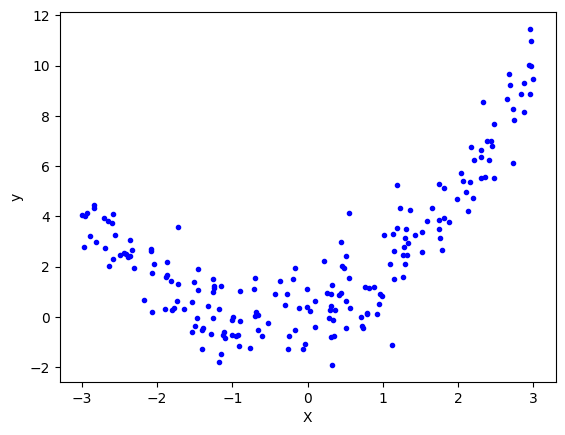

In [18]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_preds = lr.predict(X_test)

In [23]:
r2_score(y_test, y_preds)

0.3430769838620724

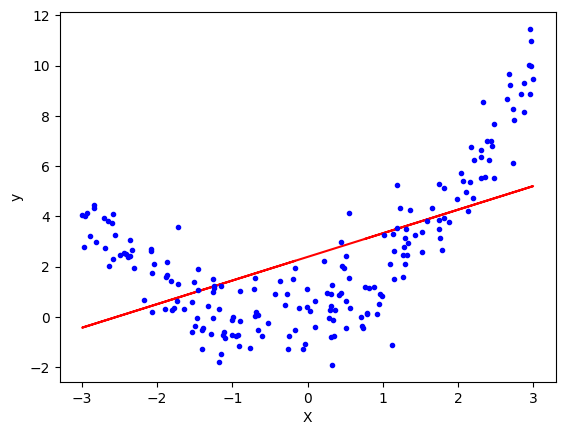

In [24]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [25]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [26]:
print(X_train[0])
print(X_train_trans[0])

[-0.17169335]
[ 1.         -0.17169335  0.02947861]


In [27]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [28]:
y_preds  = lr.predict(X_test_trans)

In [29]:
r2_score(y_test, y_preds)

0.877652522312016

In [38]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_trans = poly.transform(X_new)
y_new = lr.predict(X_new_trans)

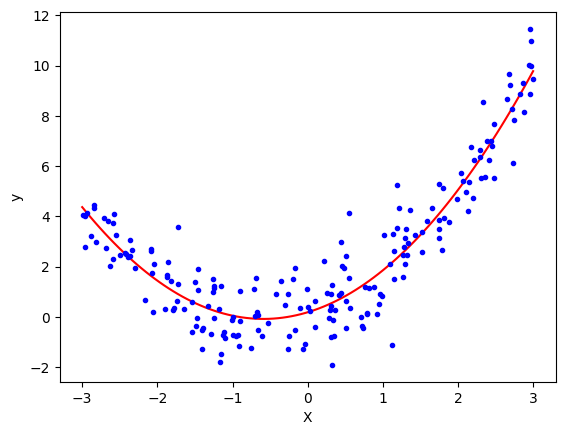

In [39]:
plt.plot(X_new, lr.predict(X_new_trans), color='r')
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [46]:
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, 'r', label="Degree" + str(degree), linewidth=2)

    plt.plot(X_train, y_train, 'b.', linewidth=3)
    plt.plot(X_test, y_test, 'g.', linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, -1, 10])
    plt.show()

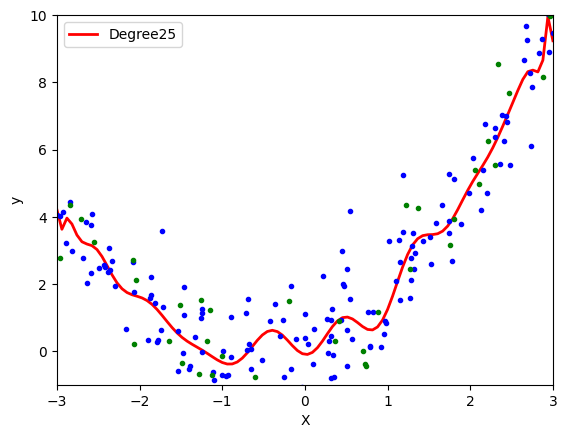

In [49]:
polynomial_regression(degree=25) # will work best for deg=2

**Multiple Polynomial Regression**

In [50]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2 *y + 0.1*x*y + 2 + np.random.randn(100, 1)

In [52]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [55]:
X_multi = np.array([x,y]).reshape(100, 2)
X_multi.shape

(100, 2)

In [56]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [59]:
print("Input", poly.n_features_in_)
print("Output", poly.n_output_features_)
print("Powers\n", poly.powers_)

Input 2
Output 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [61]:
X_multi_trans.shape

(100, 6)

In [62]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [67]:
z_final = lr.predict(X_multi_trans).reshape(10, 10)

In [68]:
import plotly.graph_objects as go

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)

fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x=x_input, y=y_input,z=z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()